In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [12]:
# Load the dataset
df = pd.read_csv('TSLA.csv')

# Use only the 'Close' column
data = df[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Define time step and split data
time_step = 100
X, y = create_dataset(scaled_data, time_step)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [13]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(100, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
42/42 [==============================] - 3s 52ms/step - loss: 0.0023 - val_loss: 0.0046
Epoch 2/100
42/42 [==============================] - 2s 44ms/step - loss: 1.9025e-04 - val_loss: 0.0028
Epoch 3/100
42/42 [==============================] - 2s 44ms/step - loss: 1.7285e-04 - val_loss: 0.0032
Epoch 4/100
42/42 [==============================] - 2s 46ms/step - loss: 1.6768e-04 - val_loss: 0.0025
Epoch 5/100
42/42 [==============================] - 2s 47ms/step - loss: 1.5297e-04 - val_loss: 0.0028
Epoch 6/100
42/42 [==============================] - 2s 50ms/step - loss: 1.6257e-04 - val_loss: 0.0021
Epoch 7/100
42/42 [==============================] - 2s 49ms/step - loss: 1.4422e-04 - val_loss: 0.0025
Epoch 8/100
42/42 [==============================] - 3s 67ms/step - loss: 1.3194e-04 - val_loss: 0.0025
Epoch 9/100
42/42 [==============================] - 2s 45ms/step - loss: 1.2353e-04 - val_loss: 0.0020
Epoch 10/100
42/42 [==============================] - 2s 45ms/step -

In [15]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) # Undo scaling

21/21 [==============================] - 1s 7ms/step


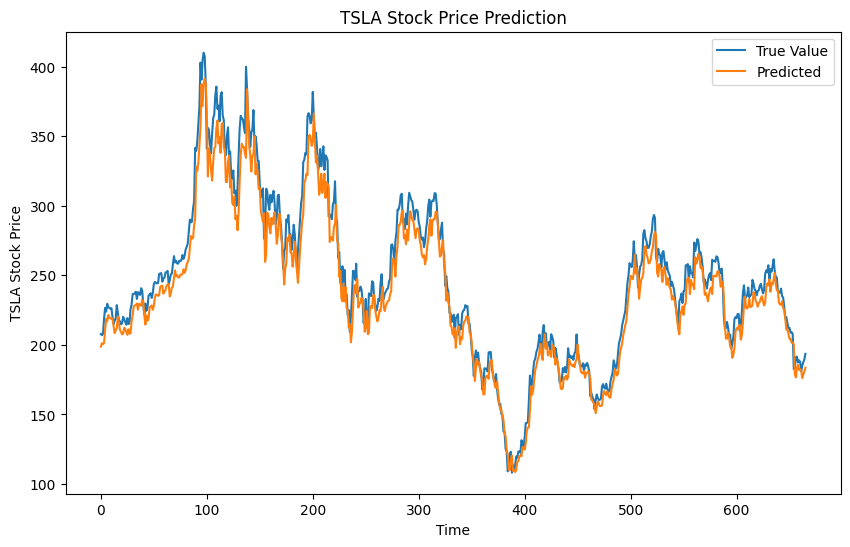

In [16]:
# plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)), label='True Value')

# plt.plot(predictions, label='Predicted')


# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)), label='True Value')
plt.plot(predictions, label='Predicted')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TSLA Stock Price')
plt.legend()
plt.show()
